In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('../data/ontario_electricity_RAW.csv')

In [3]:
df.head()

,date,hour,hourly_demand,hourly_average_price
0,2002-05-01,1,14137000,22.97
1,2002-05-01,2,13872000,23.27
2,2002-05-01,3,13820000,24.54
3,2002-05-01,4,13744000,15.17
4,2002-05-01,5,14224000,23.59


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183432 entries, 0 to 183431
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  183432 non-null  object 
 1   hour                  183432 non-null  int64  
 2   hourly_demand         183432 non-null  int64  
 3   hourly_average_price  183432 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.6+ MB


In [5]:
 df.describe(include = 'all')

,date,hour,hourly_demand,hourly_average_price
count,183432,183432.000000,1.834320e+05,183432.000000
unique,7643,NaN,NaN,NaN
top,2023-04-03,NaN,NaN,NaN
freq,24,NaN,NaN,NaN
mean,NaN,12.500000,1.624913e+07,33.812201
std,NaN,6.922205,2.592200e+06,33.905004
min,NaN,1.000000,2.270000e+06,-138.790000
25%,NaN,6.750000,1.430700e+07,14.380000
50%,NaN,12.500000,1.614600e+07,29.755000
75%,NaN,18.250000,1.803900e+07,43.090000


In [6]:
df.isnull().sum()

date                    0
hour                    0
hourly_demand           0
hourly_average_price    0
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183432 entries, 0 to 183431
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  183432 non-null  datetime64[ns]
 1   hour                  183432 non-null  int64         
 2   hourly_demand         183432 non-null  int64         
 3   hourly_average_price  183432 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.6 MB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df[['hourly_demand', 'hourly_average_price']].describe()

,hourly_demand,hourly_average_price
count,1.834320e+05,183432.000000
mean,1.624913e+07,33.812201
std,2.592200e+06,33.905004
min,2.270000e+06,-138.790000
25%,1.430700e+07,14.380000
50%,1.614600e+07,29.755000
75%,1.803900e+07,43.090000
max,2.700500e+07,1891.140000


In [11]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df ['date'].dt.day
df['day_name'] = df['date'].dt.day_name()

In [12]:
df.head()

,date,hour,hourly_demand,hourly_average_price,year,month,month_name,day,day_name
0,2002-05-01,1,14137000,22.97,2002,5,May,1,Wednesday
1,2002-05-01,2,13872000,23.27,2002,5,May,1,Wednesday
2,2002-05-01,3,13820000,24.54,2002,5,May,1,Wednesday
3,2002-05-01,4,13744000,15.17,2002,5,May,1,Wednesday
4,2002-05-01,5,14224000,23.59,2002,5,May,1,Wednesday


hour
1     1.402254e+07
2     1.364156e+07
3     1.342573e+07
4     1.339079e+07
5     1.363902e+07
6     1.434955e+07
7     1.545729e+07
8     1.639578e+07
9     1.685587e+07
10    1.714082e+07
11    1.732352e+07
12    1.737385e+07
13    1.736630e+07
14    1.731070e+07
15    1.731165e+07
16    1.752241e+07
17    1.791232e+07
18    1.820800e+07
19    1.822157e+07
20    1.809972e+07
21    1.774383e+07
22    1.686879e+07
23    1.571233e+07
24    1.468518e+07
Name: hourly_demand, dtype: float64


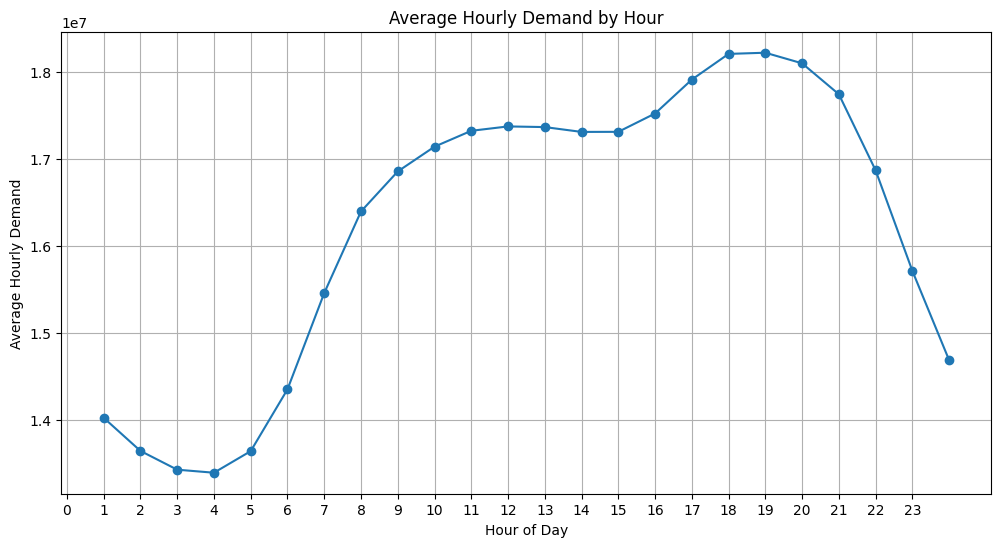

In [13]:
hourly_avg = df.groupby('hour')['hourly_demand'].mean()
print(hourly_avg)
plt.figure(figsize=(12,6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.xticks(range(0,24,1))  
plt.xlabel('Hour of Day')
plt.ylabel('Average Hourly Demand')
plt.title('Average Hourly Demand by Hour')
plt.grid(True)
plt.show()

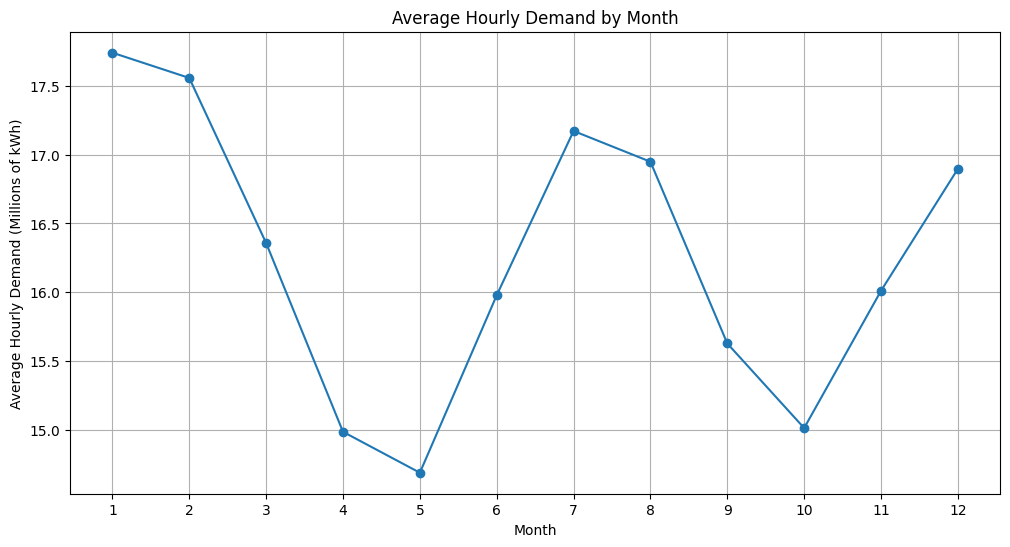

In [14]:
# Group by month number
monthly_avg = df.groupby('month')['hourly_demand'].mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_avg.index, monthly_avg.values / 1_000_000, marker='o')  # divide by 1 million for readability
plt.xticks(range(1,13))  # 1 to 12 months
plt.xlabel('Month')
plt.ylabel('Average Hourly Demand (Millions of kWh)')
plt.title('Average Hourly Demand by Month')
plt.grid(True)
plt.show()


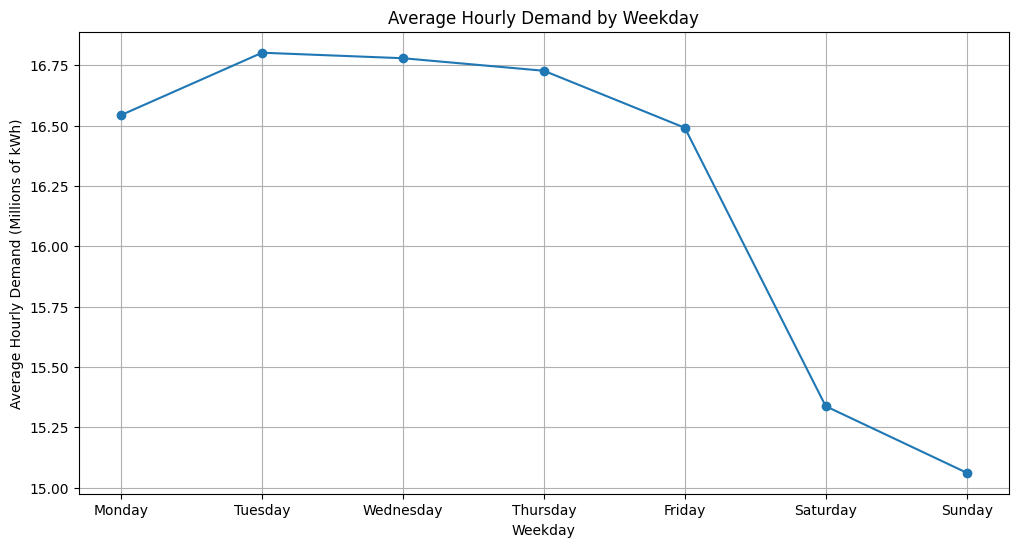

In [15]:
# Group by day_name
weekday_avg = df.groupby('day_name')['hourly_demand'].mean()

# Order correctly
weekday_avg = weekday_avg.reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])

# Plot
plt.figure(figsize=(12,6))
plt.plot(weekday_avg.index, weekday_avg.values / 1_000_000, marker='o')
plt.xlabel('Weekday')
plt.ylabel('Average Hourly Demand (Millions of kWh)')
plt.title('Average Hourly Demand by Weekday')
plt.grid(True)
plt.show()


In [16]:
# Define weekdays and weekends
df['is_weekend'] = df['day_name'].isin(['Saturday','Sunday'])

# Group by weekend/weekday
weekend_weekday_avg = df.groupby('is_weekend')['hourly_demand'].mean() / 1_000_000  # millions kWh
weekend_weekday_avg


is_weekend
False    16.669061
True     15.199494
Name: hourly_demand, dtype: float64

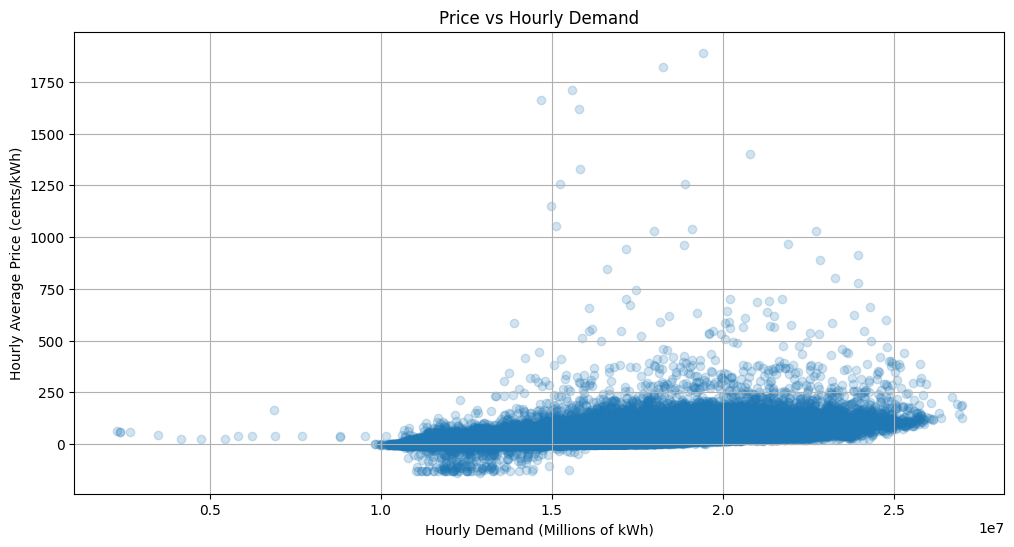

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(df['hourly_demand'], df['hourly_average_price'], alpha=0.2)
plt.xlabel('Hourly Demand (Millions of kWh)')
plt.ylabel('Hourly Average Price (cents/kWh)')
plt.title('Price vs Hourly Demand')
plt.grid(True)
plt.show()


In [18]:
##Export Cleaned Data to MySQL
!pip install pymysql sqlalchemy


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from sqlalchemy import create_engine

In [20]:
username = "root"           
password = "forgot pass"  ##CHANGE IT TO YOUR PASSWORD
host = "localhost"
port = "3306"
database = "ontario_energy_demand"

In [21]:
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

In [22]:
table_name = "electricity"   # table name in SQL
df.to_sql(table_name, engine, if_exists="replace", index=False)

183432

In [23]:
sample = pd.read_sql(f"SELECT * FROM {table_name} LIMIT 5;", engine)
print(sample)

        date  hour  hourly_demand  hourly_average_price  year  month  \
0 2002-05-01     1       14137000                 22.97  2002      5   
1 2002-05-01     2       13872000                 23.27  2002      5   
2 2002-05-01     3       13820000                 24.54  2002      5   
3 2002-05-01     4       13744000                 15.17  2002      5   
4 2002-05-01     5       14224000                 23.59  2002      5   

  month_name  day   day_name  is_weekend  
0        May    1  Wednesday           0  
1        May    1  Wednesday           0  
2        May    1  Wednesday           0  
3        May    1  Wednesday           0  
4        May    1  Wednesday           0  


In [24]:
# Save cleaned CSV to the same folder as your notebook
df.to_csv("ontario_energy_cleaned.csv", index=False)
